#Problem 3 (Interpolation)

First we write a function for Lagrange polynomial interpolation. For given $x_n$ points, $L_j(x) = y_j$ value is interpolated as:

\begin{equation}
L_j(x) = \frac{(x - x_0)(x - x_1)...(x - x_{j-1})(x - x_{j+1})...(x - x_n)}{(x_j - x_0)(x_j - x_1)...(x_j - x_{j-1})(x_j - x_{j+1})...(x_j - x_n)}
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def interp(xs, ys, n, x):
  ans = 0

  for i in range(n):
    ratio = ys[i]
    for j in range(n):
      if j != i:
        ratio *= (x - xs[j])/(xs[i] - xs[j])
    ans += ratio

  return ans

We have a function for an equation of state:

\begin{equation}
P(\rho) = H(\rho_T - \rho)\kappa_1\rho^{\Gamma_1} + H(\rho - \rho_T)\kappa_2\rho^{\Gamma_2}
\end{equation}

\begin{equation}
H(x) = \frac{1}{1 + e^{-2\alpha x}}
\end{equation}

The constants are: $\Gamma_1 = 4/3$, $\Gamma_2 = 5/3$, $\kappa_1 = 20$, $\kappa_2 = 1$, $\rho_T = 5$, $\alpha = 5$.

We can plot this function.

In [ ]:
def eos(x, t):
  return 20*x**(4/3)/(1 + np.exp(-10*(t - x))) + x**(5/3)/(1 + np.exp(-10*(x - t)))

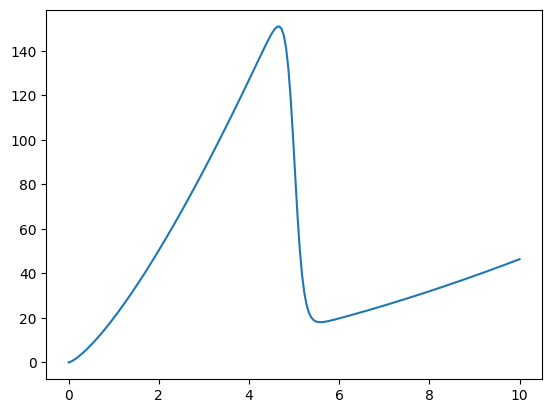

In [ ]:
Xs = np.linspace(0, 10, 200)
Ys = eos(Xs, 5)

plt.plot(Xs, Ys)
plt.show()

In [ ]:
I = np.linspace(4.5, 5.5, 200)
I_5 = np.linspace(4.5, 5.5, 5); I_10 = np.linspace(4.5, 5.5, 10); I_20 = np.linspace(4.5, 5.5, 20)
y_5 = eos(I_5, 5); y_10 = eos(I_10, 5); y_20 = eos(I_20, 5)

Y = eos(I, 5)

y_interp_5 = np.zeros(200); y_interp_10 = np.zeros(200); y_interp_20 = np.zeros(200)

for i in range(200):
  y_interp_5[i] = interp(I_5, y_5, 5, I[i])

for i in range(200):
  y_interp_10[i] = interp(I_10, y_10, 10, I[i])

for i in range(200):
  y_interp_20[i] = interp(I_20, y_20, 20, I[i])


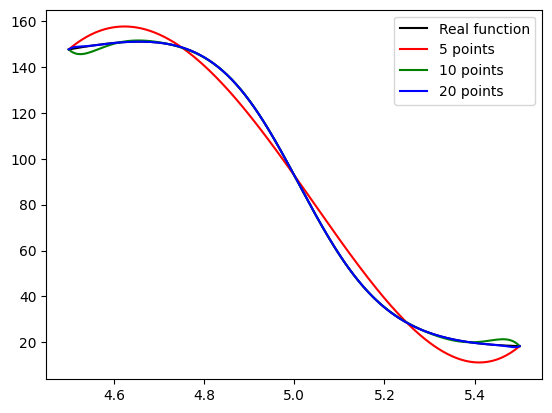

In [ ]:
plt.plot(I, Y, label = 'Real function', color = 'black')
plt.plot(I, y_interp_5, label = '5 points', color = 'red')
plt.plot(I, y_interp_10, label = '10 points', color = 'green')
plt.plot(I, y_interp_20, label = '20 points', color = 'blue')
plt.legend()
plt.show()

In [ ]:
I2_5 = np.linspace(0, 10, 5); I2_10 = np.linspace(0, 10, 10); I2_20 = np.linspace(0, 10, 20)
y2_5 = eos(I2_5, 5); y2_10 = eos(I2_10, 5); y2_20 = eos(I2_20, 5)

y2_interp_5 = np.zeros(200); y2_interp_10 = np.zeros(200); y2_interp_20 = np.zeros(200)

for i in range(200):
  y2_interp_5[i] = interp(I2_5, y2_5, 5, Xs[i])

for i in range(200):
  y2_interp_10[i] = interp(I2_10, y2_10, 10, Xs[i])

for i in range(200):
  y2_interp_20[i] = interp(I2_20, y2_20, 20, Xs[i])

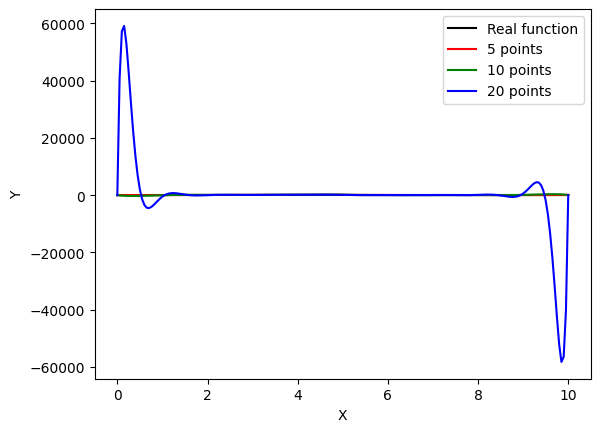

In [ ]:
plt.plot(Xs, Ys, label = 'Real function', color = 'black')
plt.plot(Xs, y2_interp_5, label = '5 points', color = 'red')
plt.plot(Xs, y2_interp_10, label = '10 points', color = 'green')
plt.plot(Xs, y2_interp_20, label = '20 points', color = 'blue')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
# plt.yscale('log')
plt.show()

Using more points create these sudden rises on edges.

In [ ]:
def chi2(y_int, I, m):
  return np.sqrt(np.sum((eos(I[i], 5) - y_int[i])**2 for i in range(m-1))/m)

In [ ]:
N = np.arange(3, 40, 1)
E1 = np.zeros(len(N)); E2 = np.zeros(len(N)); E3= np.zeros(len(N))
I3 = np.linspace(0, 30, 200)

for i in range(len(N)):
  x1_int = np.linspace(4.5, 5.5, N[i])
  y1_int = np.zeros(200)
  for j in range(200):
    y1_int[j] = interp(x1_int, y1_int, N[i], I[j])
  E1[i] = chi2(y1_int, I, N[i])

  x2_int = np.linspace(0, 10, N[i])
  y2_int = np.zeros(200)
  for j in range(200):
    y2_int[j] = interp(x2_int, y2_int, N[i], Xs[j])
  E2[i] = chi2(y2_int, Xs, N[i])

  x3_int = np.linspace(0, 10, N[i])
  y3_int = np.zeros(200)
  for j in range(200):
    y3_int[j] = interp(x3_int, y3_int, N[i], I3[j])
  E3[i] = chi2(y3_int, I3, N[i])

<ipython-input-9-ad1bba825bc5>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sqrt(np.sum((eos(I[i], 5) - y_int[i])**2 for i in range(m-1))/m)


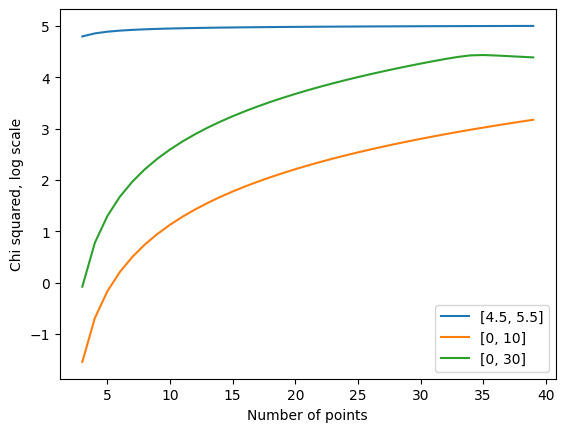

In [ ]:
plt.plot(N, np.log(E1), label = '[4.5, 5.5]')
plt.plot(N, np.log(E2), label = '[0, 10]')
plt.plot(N, np.log(E3), label = '[0, 30]')
plt.xlabel('Number of points')
plt.ylabel('Chi squared, log scale')
plt.legend()
plt.show()